In [1]:
# เริ่มต้นใช้งาน GEE
import ee
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar

ee.Authenticate()
try:
    ee.Initialize(project="ee-sakda-451407")
except Exception as e:
    ee.Authenticate()
    ee.Initialize(project="ee-sakda-451407")

In [2]:
import folium

# กำหนดพื้นที่ศึกษาที่ใหญ่ขึ้น - ครอบคลุมภาคเหนือ
# STUDY_AREA = ee.Geometry.Polygon(
#     [[[98.0, 18.0],
#       [100.0, 18.0],
#       [100.0, 20.0],
#       [98.0, 20.0],
#       [98.0, 18.0]]])  # ขยายเป็น 2° x 2° ≈ 220x220 km

# กำหนดพื้นที่ศึกษา เชียงใหม่
STUDY_AREA = ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM0_NAME', 'Thailand')).filter(ee.Filter.eq('ADM1_NAME', 'Chiang Mai'))

# show map with folium 
import folium

# config figure height
f = folium.Figure(height=300)

# add map to figure
m = folium.Map(location=[18.9, 99.0], zoom_start=7).add_to(f)

# add study area to map
folium.GeoJson(STUDY_AREA.getInfo()).add_to(m)

m

เริ่มการวิเคราะห์และทำนาย HOTSPOT COUNT รายเดือนสำหรับ 12 เดือนข้างหน้า
กำลังดึงข้อมูล NDVI รายเดือนจาก Google Earth Engine...
จำนวนภาพ MODIS ดิบ: 371
จำนวนภาพหลังคำนวณ NDVI: 371
จำนวนเดือนทั้งหมด: 97
จำนวนเดือนที่มีข้อมูล NDVI: 97
กำลังสร้างชุดข้อมูลรวม...
NDVI collection size: 97
จำนวนเดือนที่มีข้อมูล NDVI: 97
กำลังแปลงข้อมูลเป็น DataFrame...
จำนวนข้อมูลใน DataFrame: 97 เดือน
ตัวอย่างข้อมูล:
        date      NDVI  hotspot_count  year  month
0 2017-08-01  0.358349       0.000000  2017      8
1 2017-09-01  0.551192       0.000000  2017      9
2 2017-10-01  0.617875       0.000000  2017     10
3 2017-11-01  0.679727      10.105882  2017     11
4 2017-12-01  0.624503     119.725490  2017     12
5 2018-01-01  0.651047     217.674510  2018      1
6 2018-02-01  0.652364    1714.215686  2018      2
7 2018-03-01  0.603608    1088.909804  2018      3
8 2018-04-01  0.612449    1143.223529  2018      4
9 2018-05-01  0.588817      78.325490  2018      5

ช่วงข้อมูล: 2017-08-01 00:00:00 ถึง 2025-

/Users/sakdahomhuan/miniforge3/envs/udfire/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


กำลังฝึกแบบจำลอง...

Epoch 87: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 92: early stopping
Restoring model weights from the end of the best epoch: 77.

กำลังสร้างกราฟ Learning Curve...


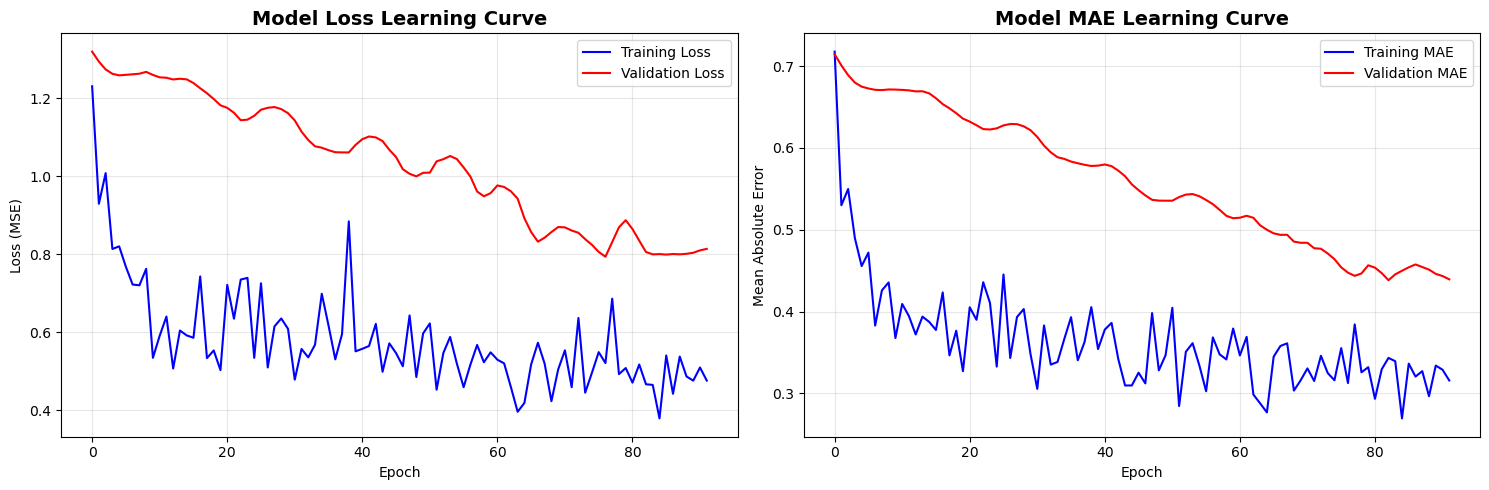

บันทึกกราฟ Learning Curve: learning_curve.png

กำลังประเมินแบบจำลอง...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
ผลการประเมินแบบจำลอง:
MSE: 864606.9459
RMSE: 929.8424
MAE: 552.7474
R²: 0.4751

กำลังสร้างกราฟ Actual vs Predicted...


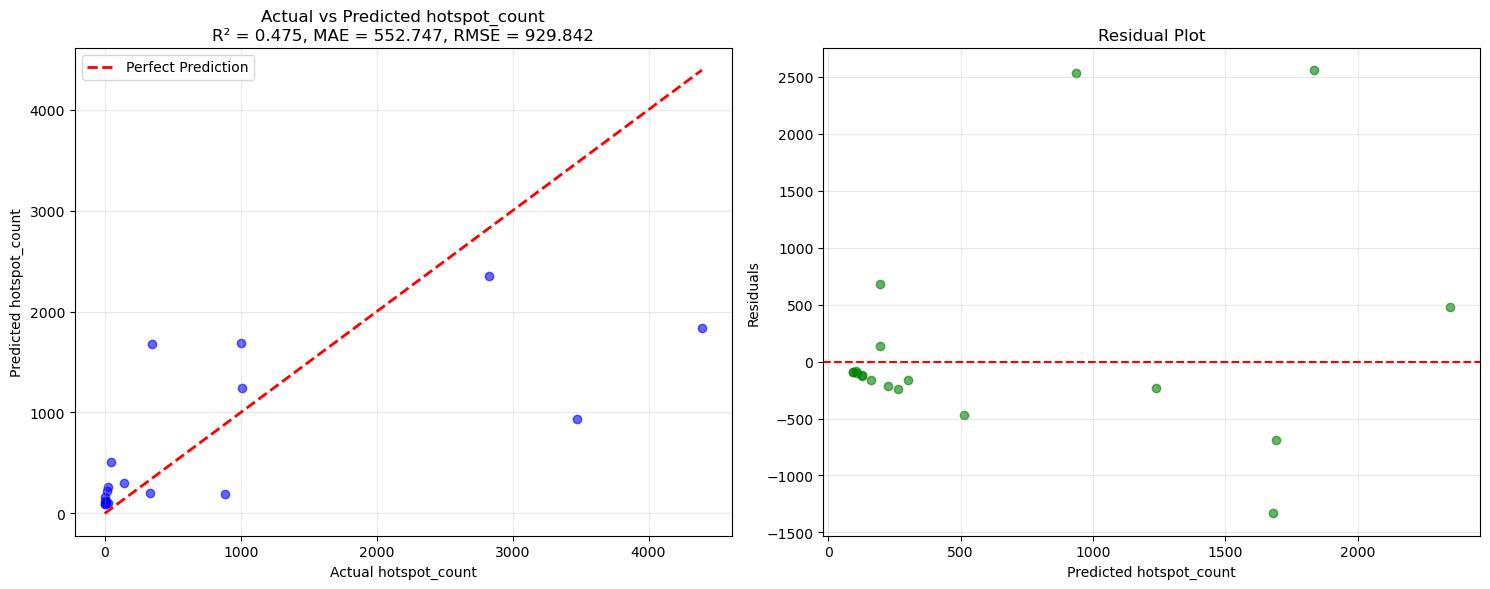

บันทึกกราฟ Actual vs Predicted: actual_vs_predicted.png

กำลังทำนาย 12 เดือนข้างหน้า...
การทำนายเสร็จสมบูรณ์!

กำลังสร้างตารางสรุปการทำนาย...

สรุปการทำนาย HOTSPOT COUNT รายเดือนสำหรับ 12 เดือนข้างหน้า
      Date     Month  Year  Predicted_hotspot_count Risk_Level     Season
2025-09-01 September  2025                    105.0  High Risk Wet Season
2025-10-01   October  2025                    167.0  High Risk Wet Season
2025-11-01  November  2025                    261.0  High Risk Wet Season
2025-12-01  December  2025                    329.0  High Risk Dry Season
2026-01-01   January  2026                    450.0  High Risk Dry Season
2026-02-01  February  2026                   1193.0  High Risk Dry Season
2026-03-01     March  2026                   2113.0  High Risk Dry Season
2026-04-01     April  2026                   1113.0  High Risk Dry Season
2026-05-01       May  2026                    193.0  High Risk Dry Season
2026-06-01      June  2026                    125.0  High 

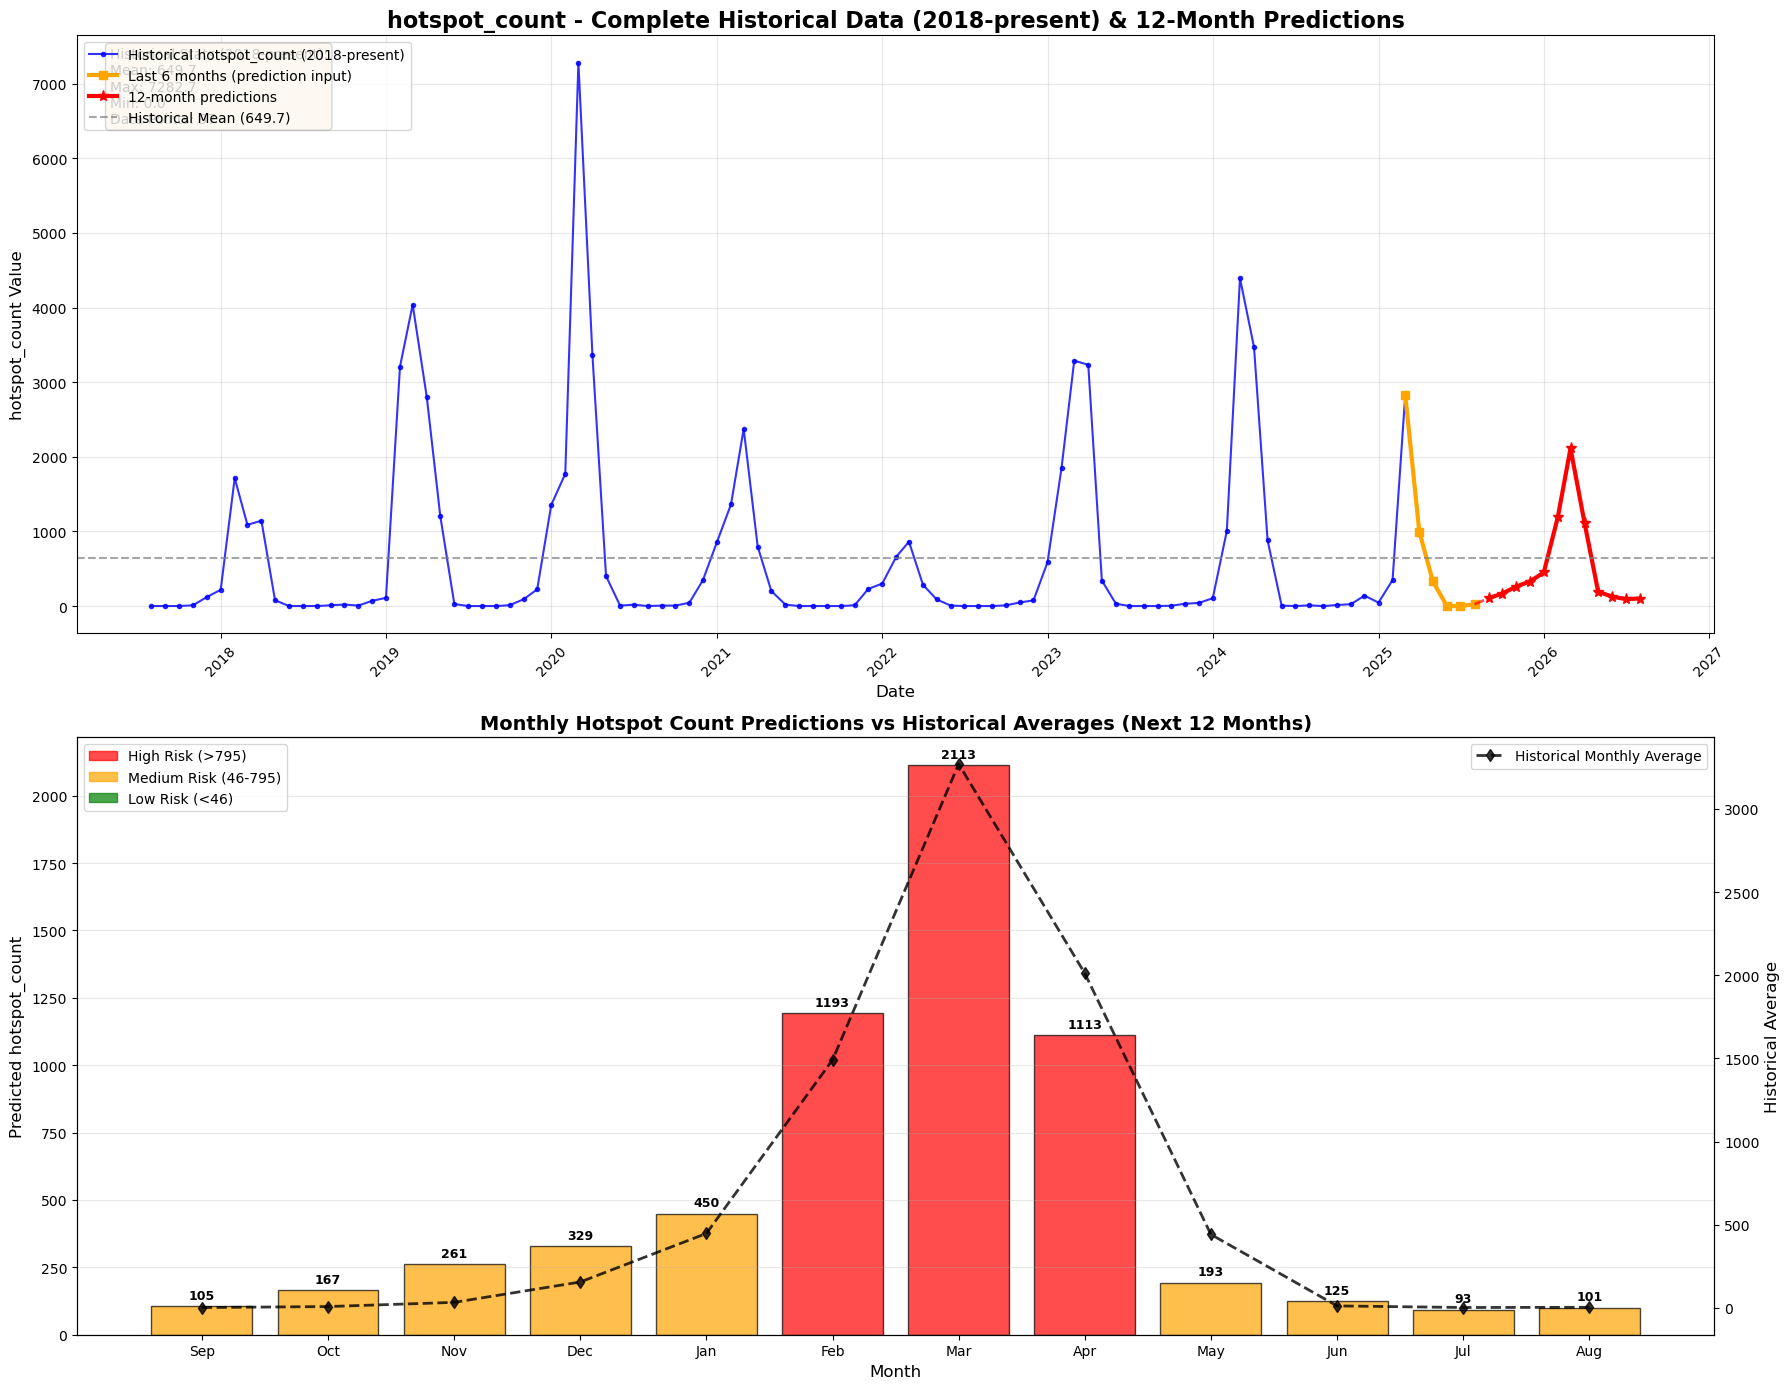

บันทึกกราฟทำนาย 12 เดือน: 12_month_prediction.png

การเปรียบเทียบการทำนายกับค่าเฉลี่ยในอดีต:
Sep: ทำนาย 105, เฉลี่ยในอดีต 2.0, ต่าง +102.8 (+5138.1%) ↑ เพิ่มขึ้น
Oct: ทำนาย 167, เฉลี่ยในอดีต 7.9, ต่าง +159.1 (+2013.2%) ↑ เพิ่มขึ้น
Nov: ทำนาย 261, เฉลี่ยในอดีต 33.2, ต่าง +228.0 (+686.9%) ↑ เพิ่มขึ้น
Dec: ทำนาย 329, เฉลี่ยในอดีต 155.6, ต่าง +173.1 (+111.3%) ↑ เพิ่มขึ้น
Jan: ทำนาย 450, เฉลี่ยในอดีต 447.4, ต่าง +2.1 (+0.5%) ↑ เพิ่มขึ้น
Feb: ทำนาย 1193, เฉลี่ยในอดีต 1490.7, ต่าง -298.2 (-20.0%) ↓ ลดลง
Mar: ทำนาย 2113, เฉลี่ยในอดีต 3269.7, ต่าง -1156.8 (-35.4%) ↓ ลดลง
Apr: ทำนาย 1113, เฉลี่ยในอดีต 2011.4, ต่าง -898.0 (-44.6%) ↓ ลดลง
May: ทำนาย 193, เฉลี่ยในอดีต 441.3, ต่าง -248.0 (-56.2%) ↓ ลดลง
Jun: ทำนาย 125, เฉลี่ยในอดีต 11.9, ต่าง +113.4 (+955.8%) ↑ เพิ่มขึ้น
Jul: ทำนาย 93, เฉลี่ยในอดีต 2.2, ต่าง +91.1 (+4047.3%) ↑ เพิ่มขึ้น
Aug: ทำนาย 101, เฉลี่ยในอดีต 3.5, ต่าง +97.4 (+2754.6%) ↑ เพิ่มขึ้น

การวิเคราะห์และทำนาย HOTSPOT COUNT รายเดือนเสร็จสมบูรณ์!
ไฟล์ที่สร้าง:
  - learning_curve.png: ก

In [4]:
# ฟังก์ชันคำนวณ NDVI จาก MOD09Q1
def calculate_ndvi(image):
    try:
        # MOD09Q1 bands: sur_refl_b01 (red), sur_refl_b02 (NIR)
        nir = image.select('sur_refl_b02').multiply(0.0001)  # Apply scale factor
        red = image.select('sur_refl_b01').multiply(0.0001)  # Apply scale factor
        
        # คำนวณ NDVI
        ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
        
        # กำหนดคุณสมบัติให้กับภาพ
        return image.addBands(ndvi).copyProperties(image, ['system:time_start'])
    except Exception as e:
        print(f"Error calculating NDVI: {e}")
        return None

# ฟังก์ชันดึงข้อมูล NDVI รายเดือนจาก MOD09Q1
def get_monthly_ndvi(start_date, end_date, study_area):
    try:
        # เรียกชุดข้อมูล MOD09Q1
        modis = ee.ImageCollection('MODIS/061/MOD09Q1') \
            .filterDate(start_date, end_date) \
            .filterBounds(study_area)
        
        # ตรวจสอบว่ามีข้อมูลหรือไม่
        size = modis.size().getInfo()
        print(f"จำนวนภาพ MODIS ดิบ: {size}")
        if size == 0:
            print("ไม่มีข้อมูล MOD09Q1 ในพื้นที่ศึกษา")
            return None
        
        # คำนวณ NDVI
        modis_ndvi = modis.map(calculate_ndvi)
        print(f"จำนวนภาพหลังคำนวณ NDVI: {modis_ndvi.size().getInfo()}")
        
        # เฉลี่ย NDVI เป็นรายเดือน
        def create_monthly_composite(year_month):
            year = ee.Number(year_month).divide(100).floor().int()
            month = ee.Number(year_month).mod(100).int()
            
            start = ee.Date.fromYMD(year, month, 1)
            end = start.advance(1, 'month')
            
            monthly_collection = modis_ndvi.filterDate(start, end)
            count = monthly_collection.size()
            
            # สร้างภาพเฉลี่ยรายเดือน
            monthly_mean = monthly_collection.mean() \
                .set('system:time_start', start.millis()) \
                .set('system:index', start.format('YYYY_MM')) \
                .set('year', year) \
                .set('month', month)
            
            return ee.Algorithms.If(
                count.gt(0), 
                monthly_mean,
                ee.Image.constant(0).rename('NDVI') \
                    .set('system:time_start', start.millis()) \
                    .set('system:index', start.format('YYYY_MM')) \
                    .set('year', year) \
                    .set('month', month)
            )
        
        # สร้างรายการปี-เดือน
        start_year = int(start_date.split('-')[0])
        end_year = int(end_date.split('-')[0])
        year_months = []
        
        for year in range(start_year, end_year + 1):
            start_month = 1 if year > start_year else int(start_date.split('-')[1])
            end_month = 12 if year < end_year else int(end_date.split('-')[1])
            
            for month in range(start_month, end_month + 1):
                year_months.append(year * 100 + month)
        
        year_months_ee = ee.List(year_months)
        
        # สร้าง ImageCollection
        monthly_images = year_months_ee.map(create_monthly_composite)
        monthly_composites = ee.ImageCollection.fromImages(monthly_images)
        
        print(f"จำนวนเดือนทั้งหมด: {monthly_composites.size().getInfo()}")
        
        return monthly_composites.select('NDVI')
    except Exception as e:
        print(f"Error getting monthly NDVI: {e}")
        return None

# ฟังก์ชันดึงข้อมูล Hotspot รายเดือนจาก FIRMS - MODIFIED VERSION
def get_monthly_hotspots(start_date, end_date, study_area):
    try:
        # เรียกชุดข้อมูล FIRMS
        firms = ee.ImageCollection('FIRMS') \
            .filterDate(start_date, end_date) \
            .filterBounds(study_area)
        
        # ตรวจสอบว่ามีข้อมูลหรือไม่
        size = firms.size().getInfo()
        print(f"จำนวนภาพ FIRMS ดิบ: {size}")
        if size == 0:
            print("ไม่มีข้อมูล FIRMS ในพื้นที่ศึกษา")
            return None
        
        # 1. Assign T21 value to 1 for each layer (convert to hotspot presence/absence)
        def convert_to_presence(image):
            # Create binary hotspot mask where T21 > 0 (presence of hotspot)
            hotspot_presence = image.select('T21').gt(0).rename('hotspot_presence')
            return image.addBands(hotspot_presence).copyProperties(image, ['system:time_start'])
        
        firms_with_presence = firms.map(convert_to_presence)
        
        # รวม hotspot เป็นรายเดือนใหม่
        def create_monthly_hotspot_composite(year_month):
            year = ee.Number(year_month).divide(100).floor().int()
            month = ee.Number(year_month).mod(100).int()
            
            start = ee.Date.fromYMD(year, month, 1)
            end = start.advance(1, 'month')
            
            monthly_collection = firms_with_presence.filterDate(start, end)
            count = monthly_collection.size()
            
            # 2. Use spatial reduce to sum new value for study area
            # 3. Sum hotspot for month with time series reduce
            if count.getInfo() > 0:
                # Sum hotspot presence across time for the month
                monthly_sum = monthly_collection.select('hotspot_presence').sum()
                
                # Reduce spatially to get total hotspot count for the study area
                hotspot_count = monthly_sum.reduceRegion(
                    reducer=ee.Reducer.sum(),
                    geometry=study_area,
                    scale=1000,
                    maxPixels=1e9
                ).get('hotspot_presence')
                
                # Create an image with the hotspot count
                hotspot_count_image = ee.Image.constant(hotspot_count).rename('hotspot_count') \
                    .set('system:time_start', start.millis()) \
                    .set('system:index', start.format('YYYY_MM')) \
                    .set('year', year) \
                    .set('month', month)
                
                return hotspot_count_image
            else:
                # No hotspots in this month
                return ee.Image.constant(0).rename('hotspot_count') \
                    .set('system:time_start', start.millis()) \
                    .set('system:index', start.format('YYYY_MM')) \
                    .set('year', year) \
                    .set('month', month)
        
        # สร้างรายการปี-เดือน
        start_year = int(start_date.split('-')[0])
        end_year = int(end_date.split('-')[0])
        year_months = []
        
        for year in range(start_year, end_year + 1):
            start_month = 1 if year > start_year else int(start_date.split('-')[1])
            end_month = 12 if year < end_year else int(end_date.split('-')[1])
            
            for month in range(start_month, end_month + 1):
                year_months.append(year * 100 + month)
        
        year_months_ee = ee.List(year_months)
        
        # สร้าง ImageCollection
        monthly_images = year_months_ee.map(create_monthly_hotspot_composite)
        monthly_composites = ee.ImageCollection.fromImages(monthly_images)
        
        print(f"จำนวนเดือนที่มี hotspot: {monthly_composites.size().getInfo()}")
        
        return monthly_composites.select(['hotspot_count'])
    except Exception as e:
        print(f"Error getting monthly hotspots: {e}")
        return None

# ฟังก์ชันสร้างข้อมูลรวมรายเดือน - FIXED VERSION
def create_monthly_dataset(ndvi_collection, study_area):
    try:
        # ตรวจสอบว่ามีข้อมูลหรือไม่
        if ndvi_collection is None:
            print("ข้อมูล NDVI เป็น None")
            return None
            
        ndvi_size = ndvi_collection.size().getInfo()
        print(f"NDVI collection size: {ndvi_size}")
        
        if ndvi_size == 0:
            print("ไม่มีข้อมูล NDVI")
            return None
        
        # ใช้วันที่ของ NDVI เป็นหลัก
        ndvi_times = ndvi_collection.aggregate_array('system:time_start')
        print(f"จำนวนเดือนที่มีข้อมูล NDVI: {ndvi_times.size().getInfo()}")
        
        # ฟังก์ชันสำหรับรวมข้อมูลแต่ละเดือน - FIXED to avoid client-side operations
        def combine_monthly_data(time_start):
            # กรองข้อมูล NDVI ตามเวลา
            ndvi_image = ndvi_collection.filter(ee.Filter.eq('system:time_start', time_start)).first()
            
            # หา hotspot ในเดือนเดียวกับ NDVI
            start_date = ee.Date(time_start)
            end_date = start_date.advance(1, 'month')
            
            # ดึงข้อมูล FIRMS ในช่วงเวลาเดียวกับ NDVI
            firms_in_period = ee.ImageCollection('FIRMS') \
                .filterDate(start_date, end_date) \
                .filterBounds(study_area)
            
            # 4. Change T21 to count hotspot - Convert to hotspot count
            def count_hotspots(image):
                return image.select('T21').gt(0).rename('hotspot_presence')
            
            hotspot_presence = firms_in_period.map(count_hotspots)
            
            # Sum hotspots spatially and temporally - FIXED to avoid client-side .getInfo()
            monthly_hotspot_sum = hotspot_presence.sum()
            
            # Use ee.Algorithms.If to handle empty collections without client-side operations
            has_hotspots = hotspot_presence.size().gt(0)
            
            hotspot_count_reduced = ee.Algorithms.If(
                has_hotspots,
                monthly_hotspot_sum.reduceRegion(
                    reducer=ee.Reducer.sum(),
                    geometry=study_area,
                    scale=1000,
                    maxPixels=1e9
                ).get('hotspot_presence'),
                0
            )
            
            # Create hotspot count image
            hotspot_count_image = ee.Image.constant(hotspot_count_reduced).rename('hotspot_count')
            
            # รวมภาพ
            combined_image = ndvi_image.addBands(hotspot_count_image)
            
            # ลดขนาดข้อมูลเป็นค่าเฉลี่ยของพื้นที่ศึกษา
            reduced = combined_image.reduceRegion(
                reducer=ee.Reducer.mean(),
                geometry=study_area,
                scale=1000,  # 1km resolution
                maxPixels=1e9
            )
            
            # สร้าง Feature พร้อมวันที่
            date_str = start_date.format('YYYY-MM-dd')
            year = start_date.get('year')
            month = start_date.get('month')
            
            # Create properties dictionary properly
            properties = reduced.combine({
                'date': date_str,
                'year': year,
                'month': month
            })
            
            return ee.Feature(None, properties)
        
        # แปลงเป็น FeatureCollection โดยใช้เวลาของ NDVI
        ndvi_times_size = ndvi_times.size().getInfo()
        if ndvi_times_size > 0:
            combined_fc = ee.FeatureCollection(ndvi_times.map(combine_monthly_data))
            return combined_fc
        else:
            print("ไม่มีข้อมูล NDVI")
            return None
            
    except Exception as e:
        print(f"Error creating monthly dataset: {e}")
        return None

# ฟังก์ชันแปลง FeatureCollection เป็น DataFrame
def fc_to_df(fc):
    try:
        # ดึงข้อมูลจาก GEE
        features = fc.getInfo()['features']
    except Exception as e:
        print("ไม่สามารถดึงข้อมูลจาก GEE ได้:", str(e))
        return pd.DataFrame()
    
    # สร้าง dictionary สำหรับเก็บข้อมูล - Updated to use hotspot_count
    data_dict = {'date': [], 'NDVI': [], 'hotspot_count': [], 'year': [], 'month': []}
    
    for feature in features:
        props = feature['properties']
        if 'NDVI' in props and props['NDVI'] is not None:
            data_dict['date'].append(props.get('date', ''))
            data_dict['NDVI'].append(props.get('NDVI', 0))
            data_dict['hotspot_count'].append(props.get('hotspot_count', 0))
            data_dict['year'].append(props.get('year', 0))
            data_dict['month'].append(props.get('month', 0))
    
    # สร้าง DataFrame
    df = pd.DataFrame(data_dict)
    
    # แปลงคอลัมน์ date เป็น datetime
    if not df.empty:
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values('date', inplace=True)
    
    return df

# ฟังก์ชันเพิ่ม seasonal features
def add_seasonal_features(df):
    """เพิ่ม features สำหรับฤดูกาล"""
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    # ฤดูแล้ง (มีค.ค. - พ.ค.) และฤดูฝน (มิ.ย. - ต.ค.)
    df['dry_season'] = ((df['month'] >= 11) | (df['month'] <= 5)).astype(int)
    df['wet_season'] = ((df['month'] >= 6) & (df['month'] <= 10)).astype(int)
    
    return df

# ฟังก์ชันเตรียมข้อมูลสำหรับการฝึกแบบจำลองรายเดือน - Updated for hotspot_count
def prepare_monthly_training_data(df, sequence_length=6, target_column='hotspot_count'):
    # ตรวจสอบว่ามีข้อมูลหรือไม่
    if df.empty:
        raise ValueError("ไม่มีข้อมูลใน DataFrame")
    
    print(f"จำนวนข้อมูลดิบ: {len(df)}")
    print(f"คอลัมน์ที่มี: {df.columns.tolist()}")
    print(f"ตัวอย่างข้อมูล:\n{df.head()}")
    
    # เพิ่ม seasonal features
    df = add_seasonal_features(df)
    
    # ล้างข้อมูลที่ขาดหาย
    df_cleaned = df.fillna(0)
    print(f"จำนวนข้อมูลหลังล้าง: {len(df_cleaned)}")
    print(f"ค่าสถิติพื้นฐาน:\n{df_cleaned.describe()}")
    
    # ตรวจสอบว่ามีข้อมูลเพียงพอหลังจากล้างข้อมูล
    min_required = sequence_length + 5
    if len(df_cleaned) < min_required:
        raise ValueError(f"ข้อมูลไม่เพียงพอสำหรับการสร้างลำดับ ต้องการอย่างน้อย {min_required} ข้อมูล แต่มีเพียง {len(df_cleaned)}")
    
    # เตรียมข้อมูล feature และ target
    feature_columns = ['NDVI', 'month_sin', 'month_cos', 'dry_season', 'wet_season']
    
    # ตรวจสอบว่า target column มีอยู่
    if target_column not in df_cleaned.columns:
        target_column = 'hotspot_count'  # Default to hotspot_count
        print(f"ใช้ {target_column} เป็น target variable")
    
    X = df_cleaned[feature_columns].values
    y = df_cleaned[[target_column]].values
    
    print(f"Features ที่ใช้: {feature_columns}")
    print(f"Target ที่ใช้: {target_column}")
    
    # ปรับขนาดข้อมูล
    from sklearn.preprocessing import StandardScaler
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    
    X_scaled = scaler_x.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # สร้างลำดับข้อมูลสำหรับ LSTM
    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - sequence_length):
        X_seq.append(X_scaled[i:i+sequence_length])
        y_seq.append(y_scaled[i+sequence_length])
    
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    
    print(f"จำนวนลำดับที่สร้างได้: {len(X_seq)}")
    print(f"รูปร่างข้อมูล X: {X_seq.shape}, y: {y_seq.shape}")
    
    return X_seq, y_seq, scaler_x, scaler_y, df_cleaned

# ฟังก์ชันสร้างแบบจำลอง LSTM สำหรับรายเดือน
def create_monthly_lstm_model(sequence_length, n_features):
    """สร้างแบบจำลอง LSTM สำหรับทำนาย hotspot รายเดือน"""
    try:
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
        from tensorflow.keras.optimizers import Adam
        from tensorflow.keras.regularizers import l2
        
        model = Sequential()
        
        # LSTM layers with regularization
        model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, n_features),
                      kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.3))
        model.add(BatchNormalization())
        
        model.add(LSTM(64, return_sequences=True,
                      kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.3))
        model.add(BatchNormalization())
        
        model.add(LSTM(32, return_sequences=False,
                      kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.3))
        
        # Dense layers
        model.add(Dense(16, activation='relu'))
        model.add(Dropout(0.2))
        
        # Output layer
        model.add(Dense(1))
        
        model.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='mse', 
                      metrics=['mae'])
        
        return model
    except ImportError:
        print("ไม่สามารถ import TensorFlow ได้ กรุณาติดตั้ง TensorFlow ก่อน")
        return None
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสร้างแบบจำลอง: {e}")
        return None

# 5. Add learning curve chart
def plot_learning_curve(history):
    """สร้างกราฟ Learning Curve"""
    try:
        import matplotlib.pyplot as plt
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Loss curve
        ax1.plot(history.history['loss'], label='Training Loss', color='blue')
        if 'val_loss' in history.history:
            ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
        ax1.set_title('Model Loss Learning Curve', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (MSE)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # MAE curve
        ax2.plot(history.history['mae'], label='Training MAE', color='blue')
        if 'val_mae' in history.history:
            ax2.plot(history.history['val_mae'], label='Validation MAE', color='red')
        ax2.set_title('Model MAE Learning Curve', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Mean Absolute Error')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("บันทึกกราฟ Learning Curve: learning_curve.png")
        
    except ImportError:
        print("ไม่สามารถ import matplotlib ได้")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสร้างกราฟ Learning Curve: {e}")

# 6. Add actual vs predict chart
def plot_actual_vs_predicted(y_true, y_pred, target_column='hotspot_count'):
    """สร้างกราฟ Actual vs Predicted"""
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Scatter plot
        ax1.scatter(y_true, y_pred, alpha=0.6, color='blue')
        
        # Perfect prediction line
        min_val = min(min(y_true), min(y_pred))
        max_val = max(max(y_true), max(y_pred))
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        
        # Calculate metrics
        r2 = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        
        ax1.set_xlabel(f'Actual {target_column}')
        ax1.set_ylabel(f'Predicted {target_column}')
        ax1.set_title(f'Actual vs Predicted {target_column}\nR² = {r2:.3f}, MAE = {mae:.3f}, RMSE = {rmse:.3f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Residual plot
        residuals = y_true - y_pred
        ax2.scatter(y_pred, residuals, alpha=0.6, color='green')
        ax2.axhline(y=0, color='r', linestyle='--')
        ax2.set_xlabel(f'Predicted {target_column}')
        ax2.set_ylabel('Residuals')
        ax2.set_title('Residual Plot')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("บันทึกกราฟ Actual vs Predicted: actual_vs_predicted.png")
        
        return r2, mae, rmse
        
    except ImportError:
        print("ไม่สามารถ import matplotlib หรือ seaborn ได้")
        return None, None, None
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสร้างกราฟ Actual vs Predicted: {e}")
        return None, None, None

# ฟังก์ชันทำนาย 12 เดือนข้างหน้า - Updated for hotspot_count
def predict_next_12_months(model, last_sequence, scaler_x, scaler_y, df_cleaned, sequence_length=6):
    """ทำนายค่า hotspot สำหรับ 12 เดือนถัดไป"""
    
    predictions = []
    prediction_dates = []
    current_sequence = last_sequence.copy()
    
    # หาวันที่สุดท้ายในข้อมูล
    last_date = df_cleaned['date'].iloc[-1]
    
    for month_ahead in range(1, 13):  # ทำนาย 12 เดือนข้างหน้า
        # ทำนายเดือนถัดไป
        pred_scaled = model.predict(current_sequence, verbose=0)
        pred_original = scaler_y.inverse_transform(pred_scaled)
        predictions.append(pred_original[0][0])
        
        # คำนวณวันที่ของเดือนถัดไป
        if last_date.month == 12:
            next_year = last_date.year + (last_date.month + month_ahead - 1) // 12
            next_month = ((last_date.month + month_ahead - 1) % 12) + 1
        else:
            next_year = last_date.year + (last_date.month + month_ahead - 1) // 12
            next_month = ((last_date.month + month_ahead - 1) % 12) + 1
        
        # สร้างวันที่ที่ถูกต้อง
        if next_month > 12:
            next_year += 1
            next_month = next_month - 12
            
        prediction_date = datetime(next_year, next_month, 1)
        prediction_dates.append(prediction_date)
        
        # สร้าง features สำหรับเดือนถัดไป
        month_sin = np.sin(2 * np.pi * next_month / 12)
        month_cos = np.cos(2 * np.pi * next_month / 12)
        dry_season = 1 if (next_month >= 11 or next_month <= 5) else 0
        wet_season = 1 if (6 <= next_month <= 10) else 0
        
        # สมมติค่า NDVI (ใช้ค่าเฉลี่ยจากข้อมูลเดือนเดียวกันในอดีต)
        same_month_data = df_cleaned[df_cleaned['month'] == next_month]
        if not same_month_data.empty:
            avg_ndvi = same_month_data['NDVI'].mean()
        else:
            avg_ndvi = df_cleaned['NDVI'].mean()
        
        # สร้าง feature vector สำหรับเดือนถัดไป
        next_features = np.array([[avg_ndvi, month_sin, month_cos, dry_season, wet_season]])
        
        # ปรับขนาดข้อมูล
        next_features_scaled = scaler_x.transform(next_features)
        
        # อัพเดท sequence สำหรับการทำนายครั้งถัดไป
        current_sequence = np.roll(current_sequence, -1, axis=1)
        current_sequence[0, -1] = next_features_scaled[0]
    
    return predictions, prediction_dates

# ฟังก์ชันสร้างกราฟทำนาย 12 เดือน - Updated for hotspot_count with full historical data
def plot_12_month_prediction(df, predictions, prediction_dates, target_column='hotspot_count'):
    """แสดงกราฟข้อมูลจริงและการทำนาย 12 เดือน"""
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        # ใช้ style ที่สวยงาม
        plt.style.use('default')
        sns.set_palette("husl")
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))
        
        # กราฟที่ 1: ข้อมูลทั้งหมดตั้งแต่ 2018 + การทำนาย
        # แสดงข้อมูลทั้งหมดตั้งแต่ 2018-01-01
        ax1.plot(df['date'], df[target_column], 
                label=f'Historical {target_column} (2018-present)', 
                color='blue', marker='o', markersize=3, linewidth=1.5, alpha=0.8)
        
        # แสดงข้อมูล 6 เดือนล่าสุดที่ใช้ทำนาย (highlight)
        last_6_months = df.tail(6)
        ax1.plot(last_6_months['date'], last_6_months[target_column], 
                label=f'Last 6 months (prediction input)', 
                color='orange', marker='s', markersize=6, linewidth=3, alpha=1.0)
        
        # แสดงการทำนาย 12 เดือน
        ax1.plot(prediction_dates, predictions, 
                label=f'12-month predictions', color='red', marker='*', markersize=8, linewidth=3)
        
        # เชื่อมเส้นจากข้อมูลล่าสุดไปยังการทำนาย
        ax1.plot([df['date'].iloc[-1], prediction_dates[0]], 
                [df[target_column].iloc[-1], predictions[0]], 
                '--', color='red', alpha=0.7, linewidth=2)
        
        # เพิ่มข้อมูลสถิติบนกราฟ
        historical_mean = df[target_column].mean()
        historical_max = df[target_column].max()
        historical_min = df[target_column].min()
        
        ax1.axhline(y=historical_mean, color='gray', linestyle='--', alpha=0.7, 
                   label=f'Historical Mean ({historical_mean:.1f})')
        
        ax1.set_title(f'{target_column} - Complete Historical Data (2018-present) & 12-Month Predictions', 
                     fontsize=16, fontweight='bold')
        ax1.set_xlabel('Date', fontsize=12)
        ax1.set_ylabel(f'{target_column} Value', fontsize=12)
        ax1.legend(fontsize=10, loc='upper left')
        ax1.grid(True, alpha=0.3)
        
        # ปรับการแสดงวันที่ให้เหมาะกับข้อมูลหลายปี
        ax1.tick_params(axis='x', rotation=45, labelsize=10)
        
        # เพิ่ม text box แสดงสถิติ
        stats_text = f'Historical Stats (2018-present):\nMean: {historical_mean:.1f}\nMax: {historical_max:.1f}\nMin: {historical_min:.1f}\nData Points: {len(df)}'
        ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # กราฟที่ 2: Seasonal Pattern with Enhanced Information
        months = [date.month for date in prediction_dates]
        month_names = [calendar.month_name[month][:3] for month in months]
        
        # Update color thresholds for hotspot count based on historical data
        high_threshold = df[target_column].quantile(0.75)
        medium_threshold = df[target_column].quantile(0.5)
        
        colors = ['red' if pred > high_threshold else 
                 'orange' if pred > medium_threshold else 'green' 
                 for pred in predictions]
        
        bars = ax2.bar(month_names, predictions, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
        
        # Add historical monthly averages for comparison
        historical_monthly = df.groupby('month')[target_column].mean()
        month_labels = [calendar.month_name[i][:3] for i in range(1, 13)]
        historical_values = [historical_monthly.get(i, 0) for i in range(1, 13)]
        
        # Show only the months we're predicting for comparison
        pred_months = [date.month for date in prediction_dates]
        historical_comparison = [historical_monthly.get(month, 0) for month in pred_months]
        
        ax2_twin = ax2.twinx()
        ax2_twin.plot(month_names, historical_comparison, 'k--', marker='d', 
                     linewidth=2, markersize=6, label='Historical Monthly Average', alpha=0.8)
        ax2_twin.set_ylabel('Historical Average', fontsize=12, color='black')
        ax2_twin.tick_params(axis='y', labelcolor='black')
        
        ax2.set_title('Monthly Hotspot Count Predictions vs Historical Averages (Next 12 Months)', 
                     fontsize=14, fontweight='bold')
        ax2.set_xlabel('Month', fontsize=12)
        ax2.set_ylabel(f'Predicted {target_column}', fontsize=12)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # เพิ่มค่าบนแท่งกราฟ
        for bar, pred in zip(bars, predictions):
            height = bar.get_height()
            ax2.annotate(f'{pred:.0f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # เพิ่ม legend สำหรับสี
        import matplotlib.patches as mpatches
        high_patch = mpatches.Patch(color='red', alpha=0.7, label=f'High Risk (>{high_threshold:.0f})')
        medium_patch = mpatches.Patch(color='orange', alpha=0.7, label=f'Medium Risk ({medium_threshold:.0f}-{high_threshold:.0f})')
        low_patch = mpatches.Patch(color='green', alpha=0.7, label=f'Low Risk (<{medium_threshold:.0f})')
        
        # Combine legends from both axes
        bars_legend = [high_patch, medium_patch, low_patch]
        line_legend = ax2_twin.get_legend_handles_labels()
        
        ax2.legend(handles=bars_legend, loc='upper left')
        ax2_twin.legend(loc='upper right')
        
        plt.tight_layout()
        plt.savefig('12_month_prediction.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("บันทึกกราฟทำนาย 12 เดือน: 12_month_prediction.png")
        
        # Print summary of changes from historical averages
        print("\n" + "="*60)
        print("การเปรียบเทียบการทำนายกับค่าเฉลี่ยในอดีต:")
        print("="*60)
        for i, (month_name, pred, hist) in enumerate(zip(month_names, predictions, historical_comparison)):
            diff = pred - hist
            change_pct = (diff / hist * 100) if hist > 0 else 0
            status = "↑ เพิ่มขึ้น" if diff > 0 else "↓ ลดลง" if diff < 0 else "→ ไม่เปลี่ยนแปลง"
            print(f"{month_name}: ทำนาย {pred:.0f}, เฉลี่ยในอดีต {hist:.1f}, ต่าง {diff:+.1f} ({change_pct:+.1f}%) {status}")
        
    except ImportError:
        print("ไม่สามารถ import matplotlib หรือ seaborn ได้")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสร้างกราฟทำนาย 12 เดือน: {e}")

# ฟังก์ชันสร้างตารางสรุปการทำนาย 12 เดือน - Updated for hotspot_count
def create_prediction_summary_table(predictions, prediction_dates, target_column='hotspot_count'):
    """สร้างตารางสรุปการทำนาย"""
    try:
        # สร้าง DataFrame สำหรับการทำนาย
        pred_df = pd.DataFrame({
            'Date': prediction_dates,
            'Month': [calendar.month_name[date.month] for date in prediction_dates],
            'Year': [date.year for date in prediction_dates],
            f'Predicted_{target_column}': predictions
        })
        
        # เพิ่มคอลัมน์ Risk Level - Updated thresholds for hotspot count
        def get_risk_level(value):
            if value > 50:  # Adjusted for hotspot count
                return 'High Risk'
            elif value > 25:  # Adjusted for hotspot count
                return 'Medium Risk'
            else:
                return 'Low Risk'
        
        pred_df['Risk_Level'] = pred_df[f'Predicted_{target_column}'].apply(get_risk_level)
        
        # เพิ่มคอลัมน์ฤดู
        def get_season(month):
            if month in ['December', 'January', 'February', 'March', 'April', 'May']:
                return 'Dry Season'
            else:
                return 'Wet Season'
        
        pred_df['Season'] = pred_df['Month'].apply(get_season)
        
        # จัดรูปแบบตาราง
        pred_df[f'Predicted_{target_column}'] = pred_df[f'Predicted_{target_column}'].round(0)
        
        print("\n" + "="*80)
        print("สรุปการทำนาย HOTSPOT COUNT รายเดือนสำหรับ 12 เดือนข้างหน้า")
        print("="*80)
        print(pred_df.to_string(index=False))
        
        # สถิติสรุป
        print("\n" + "="*50)
        print("สถิติสรุป")
        print("="*50)
        print(f"ค่าเฉลี่ย: {pred_df[f'Predicted_{target_column}'].mean():.0f} hotspots")
        print(f"ค่าสูงสุด: {pred_df[f'Predicted_{target_column}'].max():.0f} hotspots ({pred_df.loc[pred_df[f'Predicted_{target_column}'].idxmax(), 'Month']})")
        print(f"ค่าต่ำสุด: {pred_df[f'Predicted_{target_column}'].min():.0f} hotspots ({pred_df.loc[pred_df[f'Predicted_{target_column}'].idxmin(), 'Month']})")
        
        # สรุปตามระดับความเสี่ยง
        risk_summary = pred_df['Risk_Level'].value_counts()
        print(f"\nสรุปตามระดับความเสี่ยง:")
        for risk, count in risk_summary.items():
            print(f"  {risk}: {count} เดือน ({count/12*100:.1f}%)")
        
        # สรุปตามฤดู
        season_summary = pred_df.groupby('Season')[f'Predicted_{target_column}'].agg(['mean', 'max', 'min'])
        print(f"\nสรุปตามฤดู:")
        for season in season_summary.index:
            print(f"  {season}:")
            print(f"    ค่าเฉลี่ย: {season_summary.loc[season, 'mean']:.0f} hotspots")
            print(f"    ค่าสูงสุด: {season_summary.loc[season, 'max']:.0f} hotspots")
            print(f"    ค่าต่ำสุด: {season_summary.loc[season, 'min']:.0f} hotspots")
        
        # บันทึกตารางเป็นไฟล์ CSV
        pred_df.to_csv('12_month_hotspot_predictions.csv', index=False)
        print(f"\nบันทึกตารางการทำนาย: 12_month_hotspot_predictions.csv")
        
        return pred_df
        
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสร้างตารางสรุป: {e}")
        return None

# ฟังก์ชันประเมินผลแบบจำลอง
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R²: {r2:.4f}')
    
    return mse, rmse, mae, r2

# รันโค้ดหลักสำหรับการทำนายรายเดือน - Updated main function
def main():
    print("เริ่มการวิเคราะห์และทำนาย HOTSPOT COUNT รายเดือนสำหรับ 12 เดือนข้างหน้า")
    print("="*80)
    
    # กำหนดช่วงเวลาข้อมูล (เพิ่มข้อมูลให้มากขึ้น)
    start_date = '2017-08-01'
    end_date = '2025-08-31'

    print("กำลังดึงข้อมูล NDVI รายเดือนจาก Google Earth Engine...")
    ndvi_data = get_monthly_ndvi(start_date, end_date, STUDY_AREA)

    study_area = STUDY_AREA

    if ndvi_data is not None:
        print(f"จำนวนเดือนที่มีข้อมูล NDVI: {ndvi_data.size().getInfo()}")
        
        print("กำลังสร้างชุดข้อมูลรวม...")
        dataset = create_monthly_dataset(ndvi_data, study_area)

        if dataset is not None:
            print("กำลังแปลงข้อมูลเป็น DataFrame...")
            df = fc_to_df(dataset)
            print(f"จำนวนข้อมูลใน DataFrame: {len(df)} เดือน")

            if not df.empty and len(df) > 12:  # ต้องมีข้อมูลอย่างน้อย 12 เดือน
                print("ตัวอย่างข้อมูล:")
                print(df.head(10))
                print(f"\nช่วงข้อมูล: {df['date'].min()} ถึง {df['date'].max()}")
                
                print("กำลังเตรียมข้อมูลสำหรับการฝึกแบบจำลอง...")
                try:
                    X, y, scaler_x, scaler_y, df_cleaned = prepare_monthly_training_data(
                        df, sequence_length=6, target_column='hotspot_count'
                    )
                    print(f"ข้อมูลที่เตรียม: X.shape = {X.shape}, y.shape = {y.shape}")
                    
                    # แบ่งข้อมูลฝึกและทดสอบ
                    split_idx = int(len(X) * 0.8)
                    X_train, X_test = X[:split_idx], X[split_idx:]
                    y_train, y_test = y[:split_idx], y[split_idx:]

                    print(f"ข้อมูลฝึก: {X_train.shape}, ข้อมูลทดสอบ: {X_test.shape}")

                    # สร้างและฝึกแบบจำลอง
                    print("กำลังสร้างแบบจำลอง LSTM...")
                    model = create_monthly_lstm_model(X_train.shape[1], X_train.shape[2])
                    
                    if model is None:
                        print("ไม่สามารถสร้างแบบจำลองได้ กรุณาตรวจสอบการติดตั้ง TensorFlow")
                        return

                    print("กำลังฝึกแบบจำลอง...")
                    
                    # เพิ่ม callbacks สำหรับการฝึกที่ดีขึ้น
                    try:
                        from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
                        
                        early_stopping = EarlyStopping(
                            monitor='val_loss', 
                            patience=15, 
                            restore_best_weights=True,
                            verbose=1
                        )
                        
                        reduce_lr = ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.5, 
                            patience=10, 
                            min_lr=1e-7,
                            verbose=1
                        )
                        
                        callbacks = [early_stopping, reduce_lr]
                    except ImportError:
                        callbacks = []
                    
                    history = model.fit(
                        X_train, y_train,
                        epochs=100,  # เพิ่ม epochs
                        batch_size=32,
                        validation_data=(X_test, y_test) if len(X_test) > 0 else None,
                        callbacks=callbacks,
                        verbose=0
                    )

                    # 5. Add learning curve chart
                    print("\nกำลังสร้างกราฟ Learning Curve...")
                    plot_learning_curve(history)

                    # ประเมินแบบจำลอง
                    if len(X_test) > 0:
                        print("\nกำลังประเมินแบบจำลอง...")
                        y_pred = model.predict(X_test)
                        y_pred_rescaled = scaler_y.inverse_transform(y_pred)
                        y_test_rescaled = scaler_y.inverse_transform(y_test)

                        print("ผลการประเมินแบบจำลอง:")
                        mse, rmse, mae, r2 = evaluate_model(y_test_rescaled, y_pred_rescaled)

                        # 6. Add actual vs predict chart
                        print("\nกำลังสร้างกราฟ Actual vs Predicted...")
                        plot_actual_vs_predicted(
                            y_test_rescaled.flatten(), 
                            y_pred_rescaled.flatten(), 
                            target_column='hotspot_count'
                        )

                    # ทำนาย 12 เดือนข้างหน้า
                    print("\nกำลังทำนาย 12 เดือนข้างหน้า...")
                    last_sequence = X[-1:]
                    predictions, prediction_dates = predict_next_12_months(
                        model, last_sequence, scaler_x, scaler_y, df_cleaned, sequence_length=6
                    )

                    print("การทำนายเสร็จสมบูรณ์!")
                    
                    # สร้างตารางสรุป
                    print("\nกำลังสร้างตารางสรุปการทำนาย...")
                    pred_summary_df = create_prediction_summary_table(
                        predictions, prediction_dates, target_column='hotspot_count'
                    )

                    # สร้างกราฟต่างๆ
                    print("\nกำลังสร้างกราฟการทำนาย 12 เดือน...")
                    plot_12_month_prediction(df_cleaned, predictions, prediction_dates, target_column='hotspot_count')

                    print("\nการวิเคราะห์และทำนาย HOTSPOT COUNT รายเดือนเสร็จสมบูรณ์!")
                    print("ไฟล์ที่สร้าง:")
                    print("  - learning_curve.png: กราฟ Learning Curve")
                    print("  - actual_vs_predicted.png: กราฟ Actual vs Predicted")
                    print("  - 12_month_prediction.png: กราฟการทำนาย 12 เดือน")
                    print("  - 12_month_hotspot_predictions.csv: ตารางผลการทำนาย")

                except Exception as e:
                    print(f"เกิดข้อผิดพลาดในการเตรียมข้อมูล: {e}")
                    import traceback
                    print("รายละเอียดข้อผิดพลาด:")
                    traceback.print_exc()
            else:
                print("ข้อมูลไม่เพียงพอสำหรับการสร้างแบบจำลอง (ต้องการอย่างน้อย 12 เดือน)")
        else:
            print("ไม่สามารถสร้างชุดข้อมูลได้")
    else:
        print("ไม่สามารถดึงข้อมูล NDVI ได้")

# เรียกใช้ฟังก์ชันหลัก
if __name__ == "__main__":
    # Initialize Earth Engine (ต้องทำการ authenticate ก่อน)
    try:
        main()
        
    except Exception as e:
        print(f"ไม่สามารถเชื่อมต่อ Google Earth Engine ได้: {e}")
        print("กรุณาตรวจสอบ:")
        print("   1. การติดตั้ง earthengine-api")
        print("   2. การ authenticate: ee.Authenticate()")
        print("   3. การเชื่อมต่ออินเทอร์เน็ต")